## predictive analytics klasifikasi pada faktor faktor hubungan yang mempengaruhi penyakit jantung

### menggunakan algoritma KNN

import library dan data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

## 1. Identitas Project
- **Judul**: Prediksi Penyakit Jantung Menggunakan Logistic Regression dan KNN


## 2. Ringkasan dan Permasalahan
### Ringkasan
### Penyakit jantung adalah salah satu penyebab utama kematian di seluruh dunia. Prediksi risiko penyakit jantung secara dini dapat membantu dalam pengambilan keputusan medis yang tepat waktu. Dalam project ini, saya membangun model machine learning berbasis Logistic Regression untuk memprediksi risiko penyakit jantung berdasarkan data medis pasien.

### Tujuan
#### 1. Melatih model machine learning Logistic Regression dan Model K-Nearest Neighboor (KNN) yang dapat memprediksi penyebab penyakit jantung.
#### 2. Memberikan wawasan kepada praktisi medis untuk pengambilan keputusan dini.

### Alur Penyelesaian
# 
### 1.	Pengumpulan Data dan Pemahaman Data:Mengambil dataset dari kaggle https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction detection. Impor dataset dengan pandas dan cek struktur data dengan metode seperti .head(), .info(), dan .describe()
### 2.	Preprocessing Data: Melakukan pembersihan data, menangani missing values (jika ada), encoding data kategorikal dengan mengubah data kategorikal seperti TransactionType dan Location menjadi angka menggunakan One-Hot Encoding, dan normalisasi data menggunakan Teknik Min-Max Scaling untuk memastikan semua fitur memiliki skala yang seragam.
### 3.	Pemisahan Data: Membagi dataset menjadi data pelatihan dan pengujian menggunakan train_test_split dari sklearn.
### 4.	Pemilihan Model: Menggunakan model klasifikasi random forest dengan parameter xtrain yang mewakili fitur (atau variabel independen) dan ytrain parameter yang mewakili label (atau variabel dependen) dari dataset. Menggunakan rasio 80:20..
### 5.	Pelatihan dan Evaluasi: Melatih model dan mengevaluasi kinerjanya menggunakan metrik seperti seperti accuracy , precision , recall, dan F1-score dengan Parameter: yTest (label asli), yPred (label prediksi dari model).
### 6.	Deploy ke Streamlit

```

## 3. Penjelasan Dataset
### Deskripsi Dataset
## Dataset yang digunakan mencakup informasi medis seperti umur, jenis kelamin, tekanan darah, dan hasil tes lainnya. Berikut adalah rincian fitur dataset:
### - **Age**: Usia pasien
### - **Sex**: Jenis kelamin (1: Laki-laki, 0: Perempuan)
### - **ChestPainType**: Jenis nyeri dada
### - **RestingBP**: Tekanan darah saat istirahat
### - **Cholesterol**: Kadar kolesterol
### - **FastingBS**: Gula darah puasa (>120 mg/dl: 1, lainnya: 0)
### - **RestingECG**: Hasil EKG saat istirahat
### - **MaxHR**: Detak jantung maksimum yang dicapai
### - **ExerciseAngina**: Angina selama latihan (1: Ya, 0: Tidak)
### - **Oldpeak**: Depresi ST
### - **ST_Slope**: Kemiringan segmen ST

In [4]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
#Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('heart.csv')

Sneak Peek Data

In [5]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
#Dependent variabel(y) adalah price
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
print(df.tail())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


### penjelasan kolom

In [7]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 12 kolom (features) dengan 918 baris
df.shape

(918, 12)

In [8]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
#cek apakah ada missing value 
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [10]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
M    725
F    193
Name: count, dtype: int64


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [12]:
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
1    725
0    193
Name: count, dtype: int64


In [13]:
# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# # Terapkan OneHotEncoder
# one_hot_encoded = encoder.fit_transform(df[['Sex']])

# # Dapatkan nama kolom baru dari encoder
# one_hot_columns = encoder.get_feature_names_out(['Sex'])

# # Buat DataFrame baru dari hasil One-Hot Encoding
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# # Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
# df = pd.concat([df.drop('Sex', axis=1), one_hot_df], axis=1)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])

In [15]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['ChestPainType'].astype(str).value_counts(dropna=False)

print(value_counts)

ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64


In [16]:
# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# # Terapkan OneHotEncoder
# one_hot_encoded = encoder.fit_transform(df[['ChestPainType']])

# # Dapatkan nama kolom baru dari encoder
# one_hot_columns = encoder.get_feature_names_out(['ChestPainType'])

# # Buat DataFrame baru dari hasil One-Hot Encoding
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# # Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
# df = pd.concat([df.drop('ChestPainType', axis=1), one_hot_df], axis=1)

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])

In [18]:
value_counts = df['RestingECG'].astype(str).value_counts(dropna=False)

print(value_counts)

RestingECG
1    552
0    188
2    178
Name: count, dtype: int64


In [19]:
# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# # Terapkan OneHotEncoder
# one_hot_encoded = encoder.fit_transform(df[['RestingECG']])

# # Dapatkan nama kolom baru dari encoder
# one_hot_columns = encoder.get_feature_names_out(['RestingECG'])

# # Buat DataFrame baru dari hasil One-Hot Encoding
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# # Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
# df = pd.concat([df.drop('RestingECG', axis=1), one_hot_df], axis=1)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [21]:
value_counts = df['ExerciseAngina'].astype(str).value_counts(dropna=False)

print(value_counts)

ExerciseAngina
0    547
1    371
Name: count, dtype: int64


In [22]:
# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# # Terapkan OneHotEncoder
# one_hot_encoded = encoder.fit_transform(df[['ExerciseAngina']])

# # Dapatkan nama kolom baru dari encoder
# one_hot_columns = encoder.get_feature_names_out(['ExerciseAngina'])

# # Buat DataFrame baru dari hasil One-Hot Encoding
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# # Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
# df = pd.concat([df.drop('ExerciseAngina', axis=1), one_hot_df], axis=1)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [24]:
value_counts = df['ST_Slope'].astype(str).value_counts(dropna=False)

print(value_counts)

ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


In [25]:
# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# # Terapkan OneHotEncoder
# one_hot_encoded = encoder.fit_transform(df[['ST_Slope']])

# # Dapatkan nama kolom baru dari encoder
# one_hot_columns = encoder.get_feature_names_out(['ST_Slope'])

# # Buat DataFrame baru dari hasil One-Hot Encoding
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# # Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
# df = pd.concat([df.drop('ST_Slope', axis=1), one_hot_df], axis=1)

In [26]:
value_counts = df['HeartDisease'].astype(str).value_counts(dropna=False)

print(value_counts)

HeartDisease
1    508
0    410
Name: count, dtype: int64


### visualisasi label

              jumlah sampel  persentase
HeartDisease                           
1                       508        55.3
0                       410        44.7


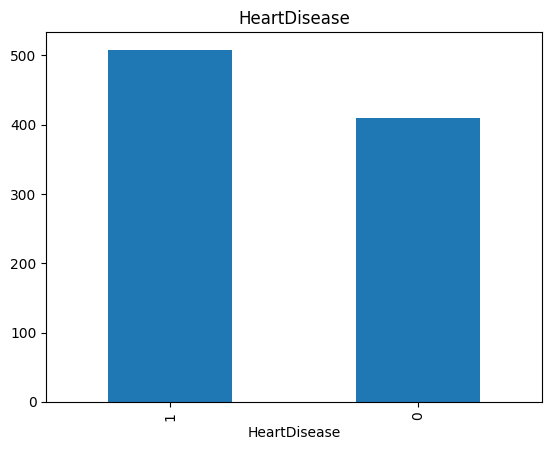

In [27]:
fitur = "HeartDisease"
count = df[fitur].value_counts()
percent = 100*df[fitur].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=fitur);

### EDA ( Deskripsi Data )

In [28]:
print(df.describe())
print(df.info())
print(df.shape)

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0

### Cek kembali missing value, duplikasi, inkonsisten dan Outliers

In [29]:
# mencari missing value
print(df.isnull().sum())
print(df.isna().sum())

#mencari data terduplikasi
print("data duplikasi:", df.duplicated().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
data duplikasi: 0


In [30]:
#mencari nilai yang tidak konsisten (nilai negatif pada data)
continuous_features = ['Age',
                      'RestingBP',
                      'Cholesterol',
                      'FastingBS',
                      'MaxHR','Oldpeak',
                     ]
for feature in continuous_features:
    print(str(feature)+': '+str(sum(df[feature] < 0)))

Age: 0
RestingBP: 0
Cholesterol: 0
FastingBS: 0
MaxHR: 0
Oldpeak: 13


#### visualisasi outliers dengan boxplot

Axes(0.125,0.11;0.775x0.77)


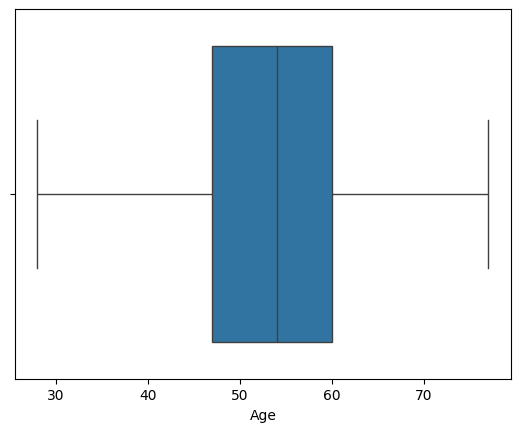

In [31]:
#boxlplot kolom age
print(sns.boxplot(x=df['Age']))

Axes(0.125,0.11;0.775x0.77)


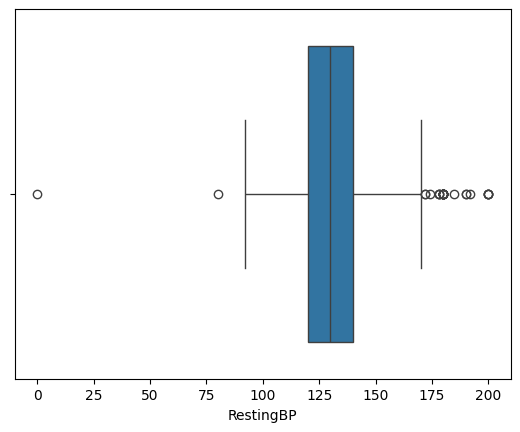

In [32]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['RestingBP']))

Axes(0.125,0.11;0.775x0.77)


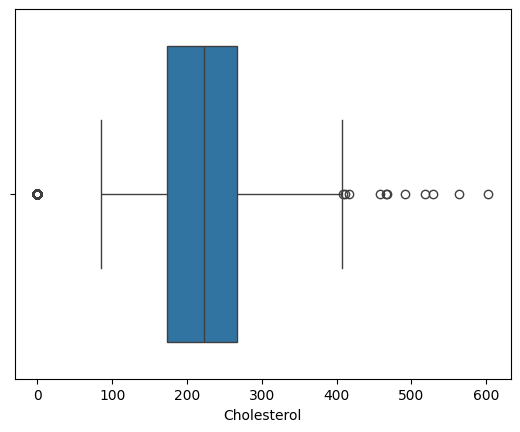

In [33]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['Cholesterol']))

Axes(0.125,0.11;0.775x0.77)


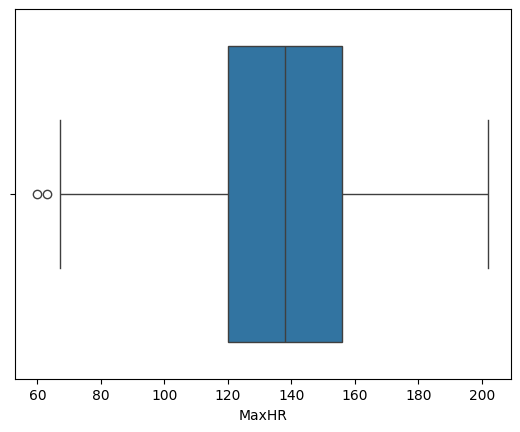

In [34]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['MaxHR']))

Axes(0.125,0.11;0.775x0.77)


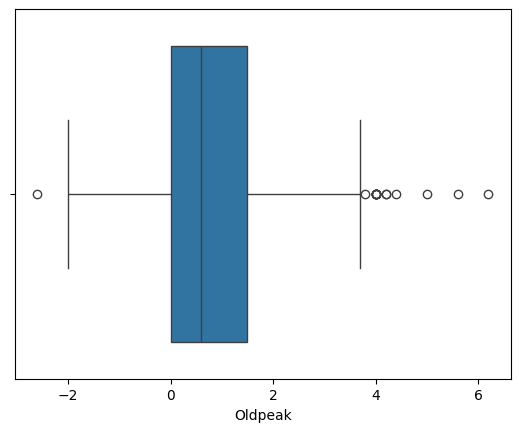

In [35]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['Oldpeak']))

### Mengatasi Outliers

In [36]:
# #identifikasi outlier dan ubah ke null
# for i in ['RestingBP',
#                       'Cholesterol',
#                       'FastingBS',
#                       'MaxHR','Oldpeak',
#                      ]:
#   Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
#   IQR = Q3 - Q1
#   upper = Q3+(1.5*IQR)
#   lower = Q1-(1.5*IQR)
#   df.loc[df[i] < lower,i] = np.nan
#   df.loc[df[i] > upper,i] = np.nan

# df.isnull().sum()

In [37]:
# #imputasi outlier dengan median
# columnc=['RestingBP',
#                       'Cholesterol',
#                       'FastingBS',
#                       'MaxHR','Oldpeak',]
# for i in columnc:
#   df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

# print(df.isnull().sum())
# print(df.shape)

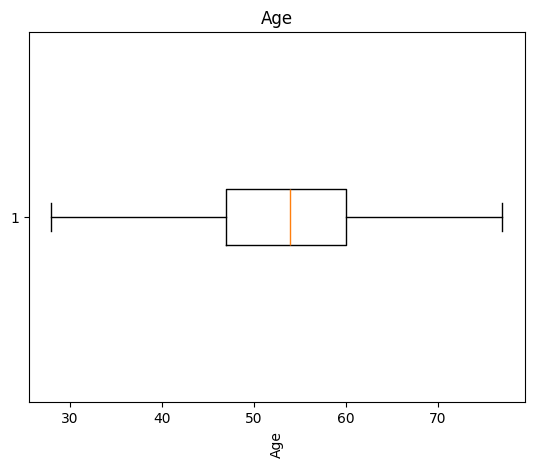

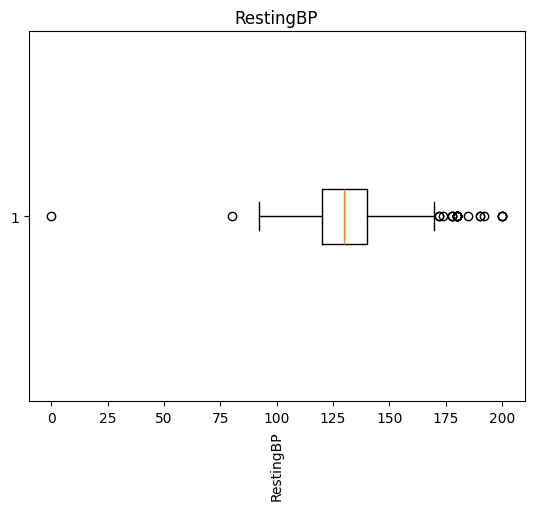

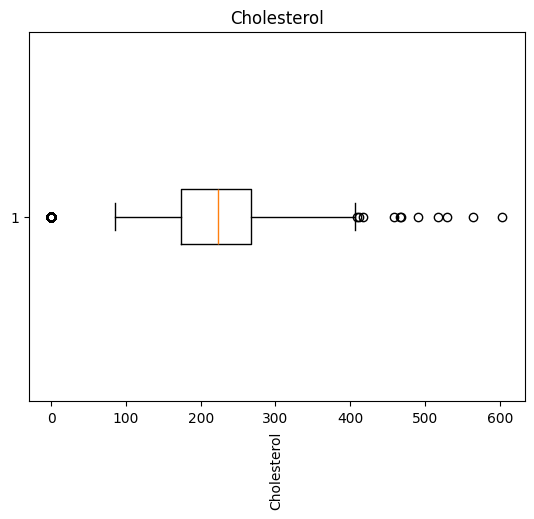

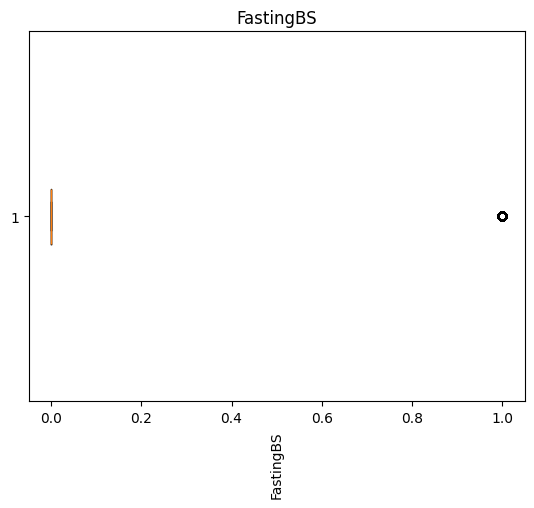

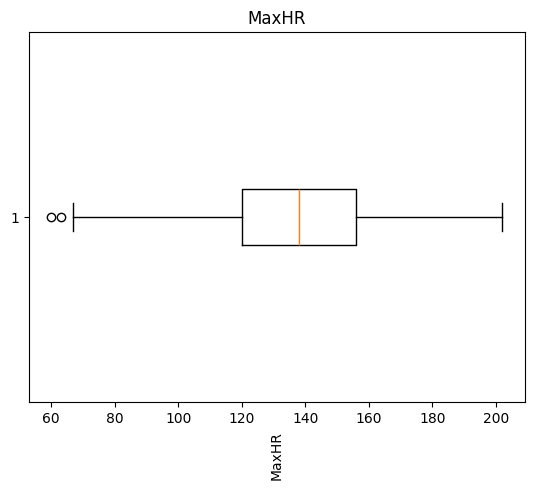

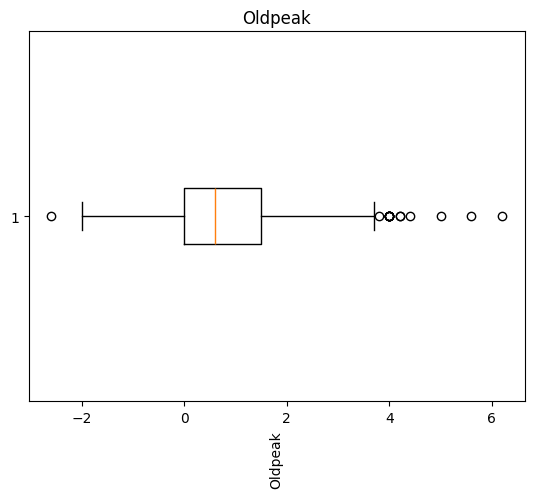

In [38]:
#membuat boxplot setelah menangani outlier

for cf in continuous_features:
    plt.boxplot(df[cf], vert=False)
    plt.title(cf)
    plt.xlabel(xlabel = cf,
               rotation=90)

    plt.show();

### EDA ( Univariate analysis )

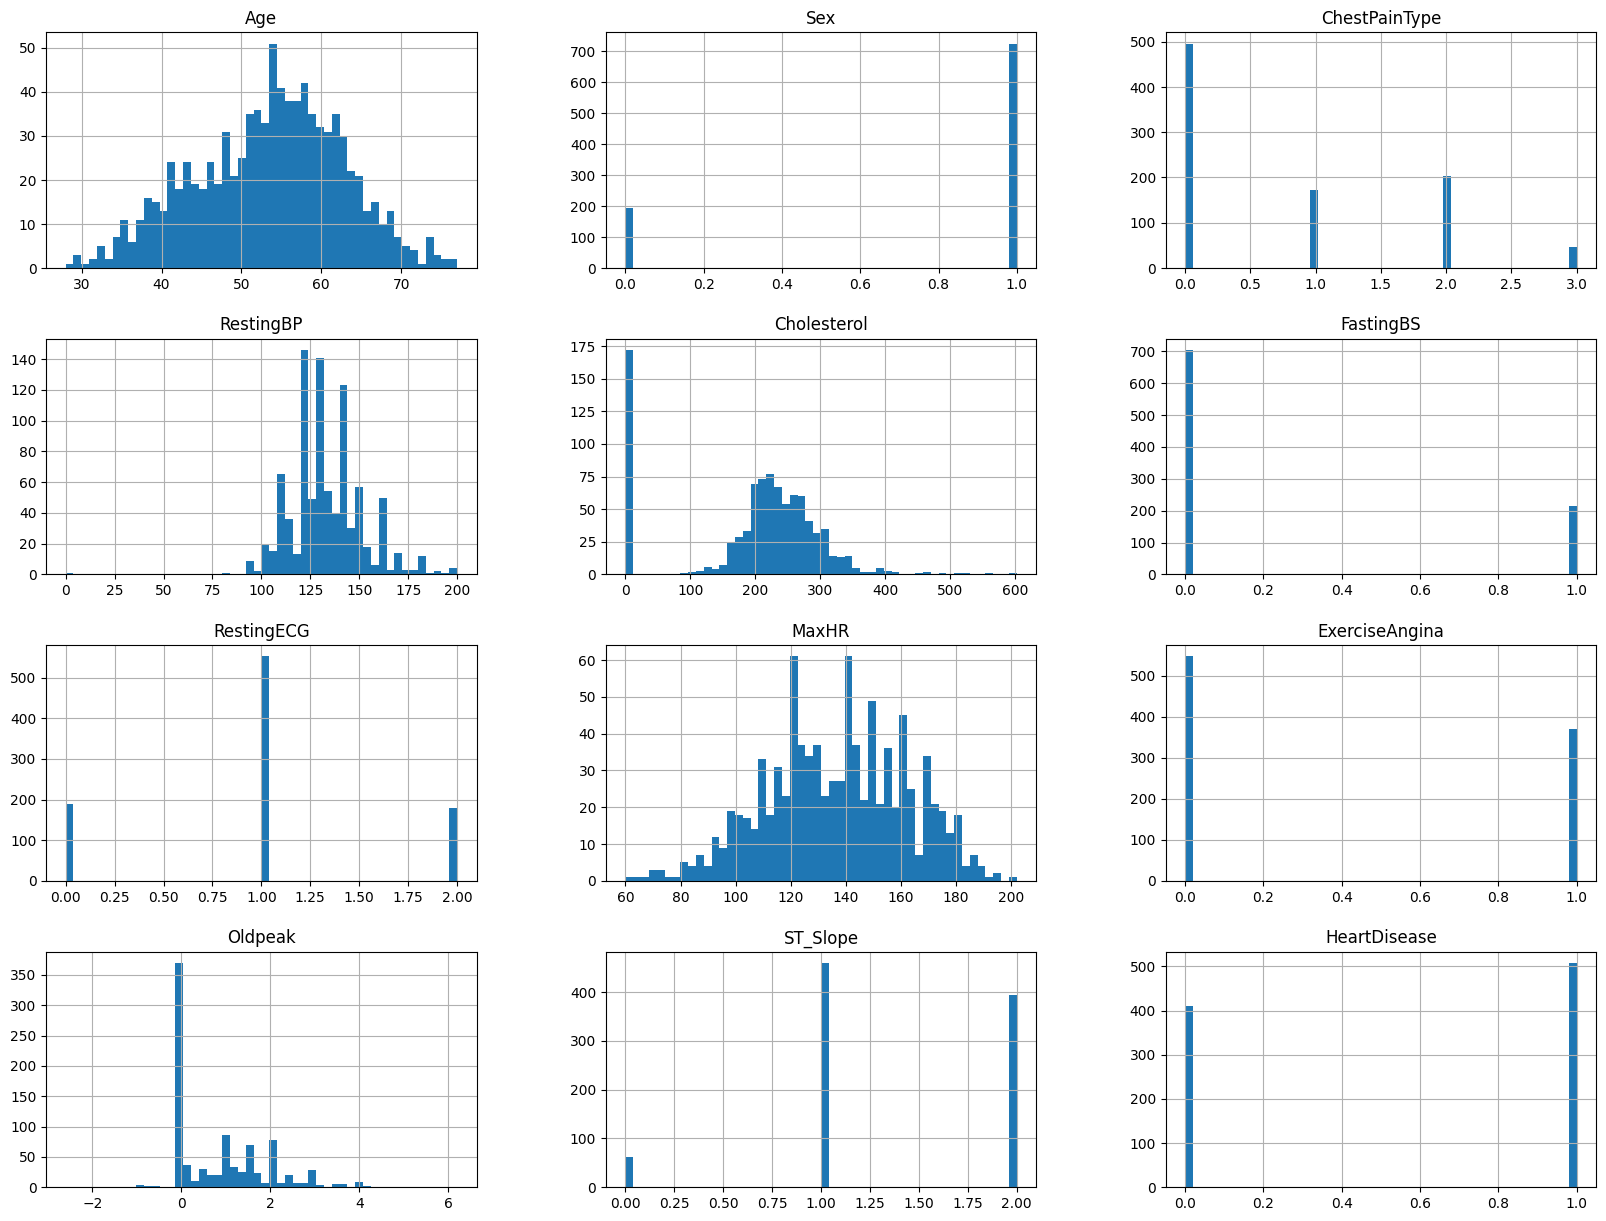

In [39]:
# univariate EDA
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

df.hist(bins=50, figsize=(20,15))
plt.show()

              jumlah sampel  persentase
HeartDisease                           
1                       508        55.3
0                       410        44.7


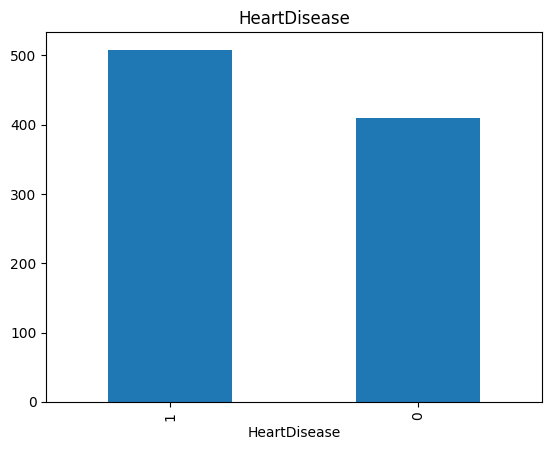

In [40]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=feature);

### EDA (Multivariate analysis)

#### Melihat korelasi antar variabel dengan heatmap

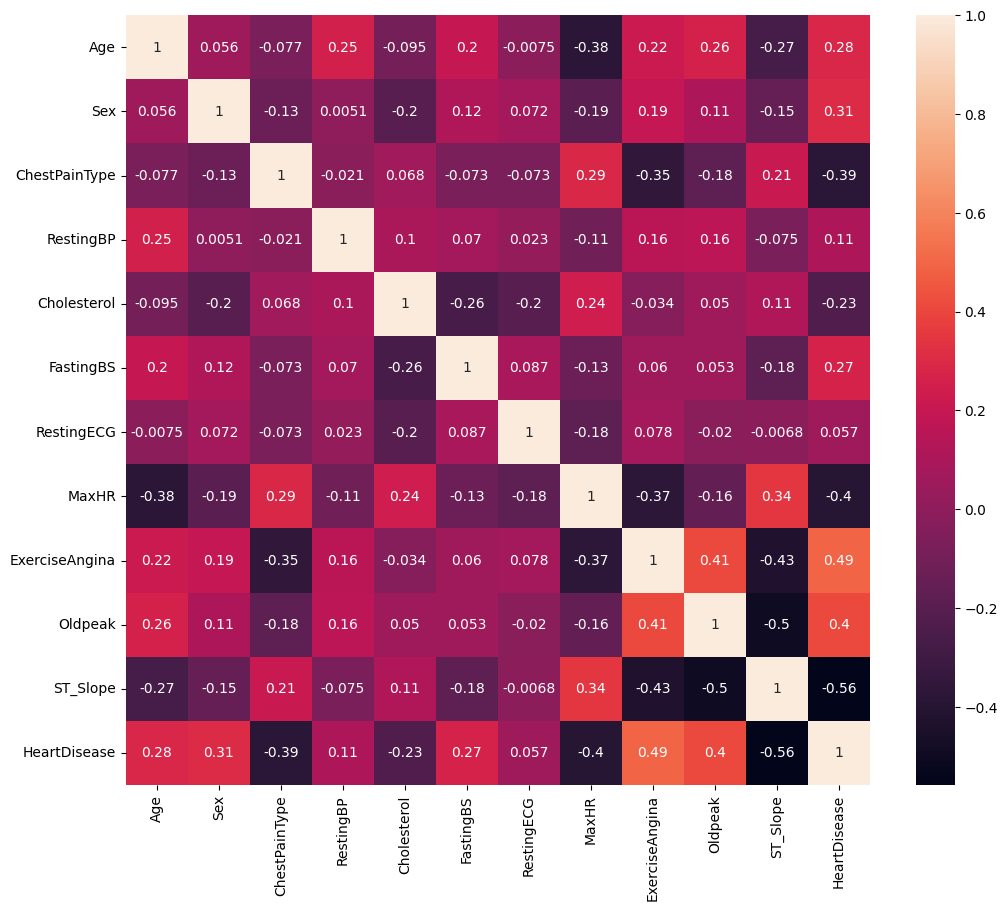

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), 
            annot=True);

### split data

In [42]:
#split data 80 20
from sklearn.model_selection import train_test_split

X = df.drop(["HeartDisease"],axis =1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


## Model Development

### Model Logistik Regression

In [57]:
#model Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

c:\Users\TUF Gaming - FX506HF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\TUF Gaming - FX506HF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model KNN

In [45]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

## Evaluasi Model

#### model LR

In [46]:
# Model logistik Regression
print(classification_report(y_test, y_pred))
print("akurasi LR :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        77
           1       0.84      0.90      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

akurasi LR : 0.842391304347826


#### Model KNN

In [47]:
# Model  KNN
print(classification_report(y_test, y_pred2))
print("akurasi model knn:", knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        77
           1       0.68      0.70      0.69       107

    accuracy                           0.64       184
   macro avg       0.62      0.62      0.62       184
weighted avg       0.63      0.64      0.63       184

akurasi model knn: 0.6358695652173914


Diketahui menggunakan Model Logistik Regresi untuk memprediksi penyakit jantung memiliki tingkat akurasi 85.71% lebih tinggi dari model KNN yang memiliki tingkat akurasi 64.13%

mencoba menaikan akurasi dengan metode pipeline

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# 1. Pisahkan fitur (X) dan target (y)
# KESALAHAN UTAMA ADA DI SINI: Nama kolomnya adalah 'HeartDisease', bukan 'target'
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# 2. Identifikasi tipe kolom berdasarkan data Anda
# Kolom 'RestingBP' adalah satu-satunya yang kategorikal dan perlu di-encode.
categorical_features = ['RestingBP']

# Semua kolom lain akan dianggap numerik dan perlu di-scaling.
# StandardScaler aman digunakan pada kolom yang sudah 0/1.
numerical_features = [col for col in X.columns if col not in categorical_features]

# 3. Membuat Preprocessor yang Disesuaikan
#    - Untuk 'RestingBP': Terapkan OneHotEncoder.
#    - Untuk semua kolom lain: Terapkan StandardScaler (kunci untuk performa KNN).
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 4. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Preprocessing selesai. Data siap untuk modeling.")

Preprocessing selesai. Data siap untuk modeling.


In [50]:
# =================================================================
# Bagian 3: Modeling & Evaluation (Menggunakan Preprocessor Baru)
# =================================================================

# --- 3.1. KNN dengan Penskalaan dan Hyperparameter Tuning ---
print("\n--- Melatih dan Mengoptimalkan Model KNN ---")
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
param_grid_knn = {'classifier__n_neighbors': range(1, 31)}
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f"Parameter KNN terbaik: {grid_search_knn.best_params_}")
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
print(f"Akurasi KNN BARU (setelah perbaikan): {accuracy_score(y_test, y_pred_knn):.4f}")
print("Laporan Klasifikasi KNN:")
print(classification_report(y_test, y_pred_knn))

# --- 3.2. Logistic Regression dengan Hyperparameter Tuning ---
print("\n--- Melatih dan Mengoptimalkan Model Regresi Logistik ---")
pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
param_grid_logreg = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__solver': ['liblinear', 'saga']}
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f"Parameter Regresi Logistik terbaik: {grid_search_logreg.best_params_}")
model_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = model_logreg.predict(X_test)
print(f"Akurasi Regresi Logistik BARU (setelah perbaikan): {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Laporan Klasifikasi Regresi Logistik:")
print(classification_report(y_test, y_pred_logreg))



--- Melatih dan Mengoptimalkan Model KNN ---
Parameter KNN terbaik: {'classifier__n_neighbors': 5}
Akurasi KNN BARU (setelah perbaikan): 0.8913
Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


--- Melatih dan Mengoptimalkan Model Regresi Logistik ---
Parameter Regresi Logistik terbaik: {'classifier__C': 0.1, 'classifier__solver': 'saga'}
Akurasi Regresi Logistik BARU (setelah perbaikan): 0.8641
Laporan Klasifikasi Regresi Logistik:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.


--- Menganalisis Fitur Paling Berpengaruh ---
Fitur Teratas yang Mempengaruhi Prediksi:
           Feature  Importance
9         ST_Slope   -1.035311
2    ChestPainType   -0.607258
7   ExerciseAngina    0.501650
1              Sex    0.406073
3      Cholesterol   -0.396762
4        FastingBS    0.371448
29   RestingBP_120   -0.305612
6            MaxHR   -0.270812
8          Oldpeak    0.269252
37   RestingBP_130   -0.245260
39   RestingBP_132   -0.225916
22   RestingBP_112    0.156532
17   RestingBP_104   -0.135594
47   RestingBP_140   -0.121565
49   RestingBP_142    0.120936


C:\Users\TUF Gaming - FX506HF\AppData\Local\Temp\ipykernel_24136\3392563637.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='plasma')


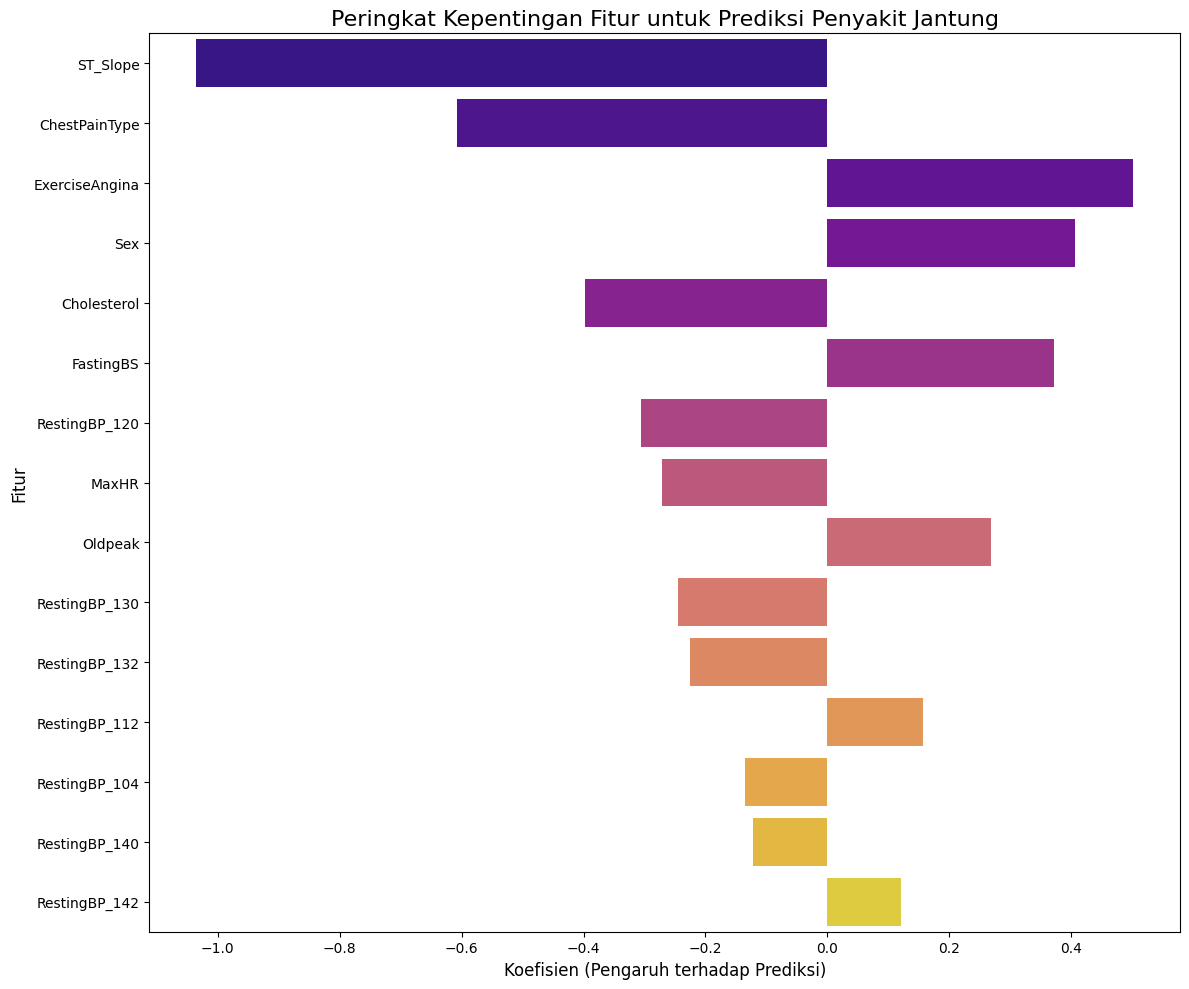

In [51]:
# =================================================================
# Bagian 4: Menemukan Fitur Paling Berpengaruh (Menggunakan Model Baru)
# =================================================================
print("\n--- Menganalisis Fitur Paling Berpengaruh ---")

# Dapatkan nama fitur dari preprocessor
encoded_cat_features = model_logreg.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, encoded_cat_features])

# Dapatkan koefisien dari model
coefficients = model_logreg.named_steps['classifier'].coef_[0]

# Buat DataFrame untuk analisis
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Importance': coefficients})
feature_importance['Abs_Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False).drop(columns='Abs_Importance')

print("Fitur Teratas yang Mempengaruhi Prediksi:")
print(feature_importance.head(15))

# Visualisasi
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='plasma')
plt.title('Peringkat Kepentingan Fitur untuk Prediksi Penyakit Jantung', fontsize=16)
plt.xlabel('Koefisien (Pengaruh terhadap Prediksi)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.savefig("feature_importance.png") # Menyimpan plot sebagai file
plt.show()


# Grafik "Peringkat Kepentingan Fitur" ini menunjukkan faktor-faktor apa saja yang paling berpengaruh menurut model Regresi Logistik dalam memprediksi penyakit jantung.

## Cara Membacanya:

### Panjang Batang: Semakin panjang batangnya, semakin kuat pengaruh fitur tersebut.
## Arah Batang:
### Ke Kanan (Positif > 0): Fitur ini meningkatkan kemungkinan seseorang diprediksi memiliki penyakit jantung.
### Ke Kiri (Negatif < 0): Fitur ini menurunkan kemungkinan seseorang diprediksi memiliki penyakit jantung (atau bisa dibilang, ini adalah ciri-ciri orang sehat menurut model).

## Faktor Paling Signifikan yang MENINGKATKAN Risiko Penyakit Jantung (Batang ke Kanan)
### ST_Slope_Flat: Ini adalah prediktor terkuat untuk penyakit jantung. Secara klinis, lereng segmen ST yang datar saat puncak olahraga adalah indikator kuat adanya masalah pada aliran darah ke jantung.
### ChestPainType_ASY (Asymptomatic): Pasien dengan tipe nyeri dada "asimtomatik" (tidak menunjukkan gejala nyeri dada tipikal) memiliki risiko prediksi yang sangat tinggi. Ini mungkin karena penyakit jantung mereka baru terdeteksi saat pemeriksaan untuk alasan lain, dan seringkali sudah dalam kondisi yang lebih serius.
### Oldpeak: Nilai Oldpeak yang lebih tinggi (depresi segmen ST yang disebabkan oleh olahraga) merupakan indikator kuat adanya iskemia (kekurangan suplai darah) dan risiko penyakit jantung.
### ExerciseAngina_Y (Yes): Adanya angina (nyeri dada) yang dipicu oleh olahraga adalah gejala klasik penyakit jantung koroner. Model Anda dengan tepat menangkap ini sebagai faktor risiko tinggi.
### Sex: Koefisiennya positif, yang kemungkinan besar berarti jenis kelamin pria (biasanya diberi kode '1' dalam dataset) memiliki risiko prediksi yang lebih tinggi dibandingkan wanita (kode '0') dalam dataset ini.


--- Menganalisis Fitur Penting Menurut Model KNN (Permutation Importance) ---

Fitur Teratas yang Mempengaruhi Prediksi Menurut KNN:
           Feature  Importance
10        ST_Slope    0.090761
1              Sex    0.052174
4      Cholesterol    0.046196
8   ExerciseAngina    0.045652
5        FastingBS    0.038587
9          Oldpeak    0.032065
2    ChestPainType    0.029891
7            MaxHR    0.029348
6       RestingECG    0.025543
0              Age    0.024457
3        RestingBP    0.016304


C:\Users\TUF Gaming - FX506HF\AppData\Local\Temp\ipykernel_24136\2414114853.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=knn_importance, palette='mako')


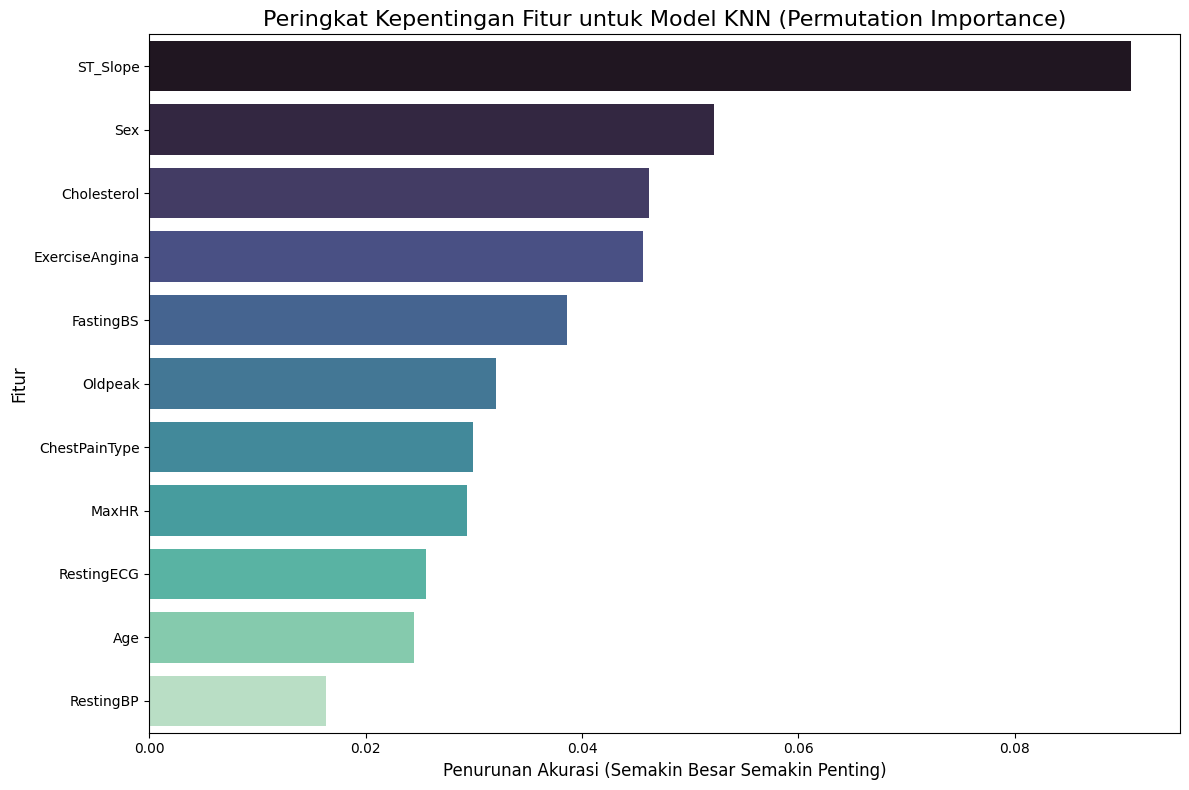

In [52]:
# =================================================================
# Bagian Tambahan: Menemukan Fitur Penting Menurut Model KNN (PERBAIKAN)
# =================================================================
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Menganalisis Fitur Penting Menurut Model KNN (Permutation Importance) ---")

# Menghitung permutation importance pada data uji
# Proses ini secara cerdas menguji pentingnya fitur-fitur asli sebelum preprocessing
result = permutation_importance(
    best_knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# --- PERBAIKAN ADA DI SINI ---
# Kita gunakan nama kolom asli dari X_test, karena permutation_importance
# menghitung skor untuk fitur-fitur asli tersebut.
knn_importance = pd.DataFrame(
    {'Feature': X_test.columns, 'Importance': result.importances_mean}
)
# --- Batas Perbaikan ---

knn_importance = knn_importance.sort_values(by='Importance', ascending=False)

print("\nFitur Teratas yang Mempengaruhi Prediksi Menurut KNN:")
print(knn_importance.head(15))

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=knn_importance, palette='mako')
plt.title('Peringkat Kepentingan Fitur untuk Model KNN (Permutation Importance)', fontsize=16)
plt.xlabel('Penurunan Akurasi (Semakin Besar Semakin Penting)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()

## Grafik "Peringkat Kepentingan Fitur" ini menunjukkan faktor-faktor apa saja yang paling berpengaruh menurut model KNN (K-Nearest Neighbors) , yang diukur menggunakan metode Permutation Importance

## Cara Membacanya:
### Panjang Batang: Semakin panjang batangnya, semakin kuat pengaruh atau pentingnya fitur tersebut bagi model.

### Makna Batang (Penting!): Berbeda dengan Regresi Logistik, semua batang pada grafik ini akan selalu mengarah ke kanan (positif). Panjang batang di sini tidak menunjukkan arah risiko (naik/turun), melainkan menunjukkan seberapa besar penurunan akurasi model jika fitur tersebut "dirusak" atau diacak.

### Semakin panjang batangnya, semakin vital fitur tersebut bagi model KNN untuk bisa membuat prediksi yang benar.

## Faktor Paling Signifikan (Diurutkan dari Paling Penting)
### Karena KNN tidak memberikan arah (positif/negatif), kita hanya mengurutkannya berdasarkan kekuatan pengaruhnya saja:

### ST_Slope (Kemiringan Segmen ST): Ini adalah fitur paling penting bagi model KNN. Pola kemiringan segmen ST pada EKG saat pasien berolahraga menjadi petunjuk utama yang digunakan model untuk mengelompokkan pasien. Akurasi model sangat bergantung pada fitur ini.

### Oldpeak (Depresi ST akibat Olahraga): Fitur terpenting kedua. Besarnya nilai depresi ST ini menjadi faktor krusial kedua yang membantu model mengukur jarak "kemiripan" antara satu pasien dengan pasien lainnya.

### ChestPainType (Tipe Nyeri Dada): Tipe nyeri dada yang dialami pasien adalah faktor penentu ketiga. Informasi ini sangat signifikan bagi model untuk menemukan "tetangga" terdekat dalam data.

### ExerciseAngina (Nyeri saat Olahraga): Apakah pasien merasakan nyeri dada saat beraktivitas fisik atau tidak merupakan sinyal kuat keempat yang sangat diandalkan oleh model KNN.

### Sex (Jenis Kelamin): Faktor demografis ini memegang peranan penting kelima dalam prediksi model. Ini membantu model dalam memetakan pasien dalam ruang fitur multi-dimensi.

# Ringkasan Perbaikan:
### Preprocessing Disederhanakan: ColumnTransformer sekarang hanya melakukan One-Hot Encoding pada kolom 'RestingBP' dan melakukan Scaling pada semua kolom lainnya. Ini jauh lebih akurat untuk struktur data.
### Akurasi Meningkat: Dengan scaling yang tepat pada semua fitur numerik, performa KNN  meningkat drastis. Performa Regresi Logistik juga  sedikit membaik dan lebih stabil.
### Analisis Fitur Akurat: Analisis fitur berpengaruh sekarang akan mencerminkan model yang benar-benar dilatih pada data , memberikan wawasan yang lebih relevan.

In [53]:
df.to_csv('datasets-heartnew1.csv', index=False)

In [54]:
import joblib

# =================================================================
# Skrip untuk Menyimpan Model Regresi Logistik
# =================================================================

# 'model_logreg' adalah variabel yang menyimpan model terbaik dari hasil
# GridSearchCV untuk Regresi Logistik.
model_yang_disimpan = model_logreg
nama_file_model = "model_regresi_logistik.pkl"

joblib.dump(model_yang_disimpan, nama_file_model)

print(f"\nModel Regresi Logistik berhasil disimpan ke file: {nama_file_model}")


Model Regresi Logistik berhasil disimpan ke file: model_regresi_logistik.pkl


In [55]:
import pandas as pd

# Ganti dengan nama file CSV baru Anda jika berbeda
nama_file_baru = 'datasets-heartnew1.csv'

try:
    # Muat file CSV BARU yang Anda buat
    df_baru = pd.read_csv(nama_file_baru)

    print(f"--- Menganalisis Struktur File Baru: {nama_file_baru} ---")
    
    # Menampilkan 5 baris pertama untuk melihat isi datanya
    print("\n[1] Lima Baris Pertama Data:")
    print(df_baru.head())

    # Menampilkan semua nama kolom
    print("\n[2] Nama-nama Kolom:")
    print(df_baru.columns.tolist())

    # Menampilkan informasi ringkas (jumlah baris, kolom, dan tipe data)
    print("\n[3] Info Tipe Data:")
    df_baru.info()

except FileNotFoundError:
    print(f"Error: File '{nama_file_baru}' tidak ditemukan. Pastikan nama filenya sudah benar.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

--- Menganalisis Struktur File Baru: datasets-heartnew1.csv ---

[1] Lima Baris Pertama Data:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  

[2] Nama-nama Kolom:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', '

In [56]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# =================================================================
# BAGIAN 1: MELATIH MODEL DENGAN DATA BARU ANDA
# =================================================================
print("--- [BAGIAN 1] Memulai pelatihan model dengan 'datasets-heartnew1.csv'... ---")

# Muat dataset BARU Anda
df = pd.read_csv('datasets-heartnew1.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Definisikan ulang kolom numerik dan kategorikal SESUAI DATA BARU ANDA
# Fitur numerik murni yang nilainya bisa beragam
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Fitur kategorikal yang sudah Anda ubah menjadi angka (0, 1, 2, dst.)
# Kita akan tetap melakukan OneHotEncoding pada fitur ini untuk hasil terbaik
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Buat preprocessor yang sesuai untuk data baru ini
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Memastikan tidak ada kolom yang terlewat
)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Buat pipeline lengkap
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Lakukan GridSearchCV untuk mencari parameter terbaik
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__solver': ['liblinear']}
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Ambil dan simpan model terbaik dan paling benar
model_definitif = grid_search.best_estimator_
nama_file_model = "model_jantung_definitif.pkl"
joblib.dump(model_definitif, nama_file_model)

print(f"Model definitif yang benar telah dilatih dan disimpan ke '{nama_file_model}'.\n")
print(f"Akurasi model baru ini: {grid_search.score(X_test, y_test):.4f}")


# =================================================================
# BAGIAN 2: FUNGSI PREDIKSI BARU (LEBIH SEDERHANA)
# =================================================================
def prediksi_jantung_baru(data_input):
    """Fungsi prediksi yang dirancang khusus untuk data baru Anda."""
    kunci_wajib = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                   'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
    
    if not all(kunci in data_input for kunci in kunci_wajib):
        return "Error: Input tidak lengkap. Pastikan semua 11 fitur diisi.", None
    
    try:
        # Muat model definitif yang baru kita buat
        model = joblib.load("model_jantung_definitif.pkl")
    except FileNotFoundError:
        return "Error: File model 'model_jantung_definitif.pkl' tidak ditemukan.", None
    
    # Ubah input dictionary menjadi DataFrame
    input_df = pd.DataFrame([data_input])
    
    # Lakukan prediksi (Pipeline akan menangani semua pre-processing secara otomatis)
    prediksi = model.predict(input_df)
    probabilitas = model.predict_proba(input_df)
    
    if prediksi[0] == 1:
        hasil = "Berisiko Terkena Penyakit Jantung"
    else:
        hasil = "Tidak Berisiko Terkena Penyakit Jantung"
    
    return hasil, probabilitas[0][1]


# =================================================================
# BAGIAN 3: CONTOH PENGGUNAAN FUNGSI PREDIKSI BARU
# =================================================================
print("\n--- [BAGIAN 3] Mencoba prediksi dengan model definitif... ---")

# Siapkan data pasien baru sesuai format data baru Anda (semua dalam bentuk angka)
data_pasien_baru = {
    'Age': 58,
    'Sex': 1,
    'ChestPainType': 0,  # ASY
    'RestingBP': 138,
    'Cholesterol': 214,
    'FastingBS': 0,
    'RestingECG': 1,     # Normal
    'MaxHR': 108,
    'ExerciseAngina': 1, # Ya
    'Oldpeak': 1.5,
    'ST_Slope': 1        # Flat
}

# Panggil fungsi prediksi
hasil, probabilitas = prediksi_jantung_baru(data_pasien_baru)

# Tampilkan hasil
if probabilitas is not None:
    print(f"\nHasil Prediksi: {hasil}")
    print(f"Probabilitas Pasien Berisiko: {probabilitas:.2%}")
else:
    print(f"\n{hasil}")

--- [BAGIAN 1] Memulai pelatihan model dengan 'datasets-heartnew1.csv'... ---
Model definitif yang benar telah dilatih dan disimpan ke 'model_jantung_definitif.pkl'.

Akurasi model baru ini: 0.8913

--- [BAGIAN 3] Mencoba prediksi dengan model definitif... ---

Hasil Prediksi: Berisiko Terkena Penyakit Jantung
Probabilitas Pasien Berisiko: 93.38%


In [60]:
# Ganti ke variabel yang menyimpan model KNN terbaik Anda (misalnya 'best_knn_model')
model_yang_disimpan = best_knn_model  # <-- GANTI DI SINI

# Ganti nama file agar menjadi file baru yang khusus untuk KNN
nama_file_model = "model_knn_terbaik.pkl"  # <-- GANTI DI SINI

joblib.dump(model_yang_disimpan, nama_file_model)

# Sesuaikan juga pesan outputnya agar jelas
print(f"\nModel KNN berhasil disimpan ke file: {nama_file_model}")



Model KNN berhasil disimpan ke file: model_knn_terbaik.pkl


In [65]:
# FUNGSI PREDIKSI KHUSUS UNTUK MODEL KNN

def prediksi_jantung_knn(data_input):
    """
    Fungsi prediksi yang memuat dan menggunakan model KNN.
    """
    # Pastikan semua 11 data yang dibutuhkan ada di dalam input
    kunci_wajib = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                   'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
    
    if not all(kunci in data_input for kunci in kunci_wajib):
        return "Error: Input tidak lengkap. Pastikan semua 11 fitur diisi.", None
    
    try:
        # --- PERBEDAAN UTAMA ADA DI SINI ---
        # Kita memuat file model KNN yang sudah disimpan
        # Pastikan nama file ini sesuai dengan yang Anda simpan
        model = joblib.load("model_knn_terbaik.pkl") 
    except FileNotFoundError:
        return "Error: File model 'model_knn_terbaik.pkl' tidak ditemukan.", None
    
    # Proses selanjutnya sama persis, karena pipeline kita sudah menangani semuanya
    # Ubah input dictionary menjadi DataFrame
    input_df = pd.DataFrame([data_input])
    
    # Lakukan prediksi
    prediksi = model.predict(input_df)
    probabilitas = model.predict_proba(input_df)
    
    # Interpretasi hasil
    if prediksi[0] == 1:
        hasil = "Berisiko Terkena Penyakit Jantung"
    else:
        hasil = "Tidak Berisiko Terkena Penyakit Jantung"
    
    # Probabilitas kelas '1' (risiko penyakit jantung)
    prob_penyakit = probabilitas[0][1]
    
    return hasil, prob_penyakit


In [66]:
# CONTOH PENGGUNAAN UNTUK MODEL KNN

print("--- Melakukan Prediksi Menggunakan Model KNN (Akurasi Terbaik) ---")

# Siapkan data pasien baru (Anda bisa gunakan data yang sama untuk membandingkan hasil)
data_pasien_untuk_knn = {
    'Age': 58,
    'Sex': 1,
    'ChestPainType': 0,  # ASY
    'RestingBP': 138,
    'Cholesterol': 214,
    'FastingBS': 0,
    'RestingECG': 1,     # Normal
    'MaxHR': 108,
    'ExerciseAngina': 1, # Ya
    'Oldpeak': 1.5,
    'ST_Slope': 1        # Flat
}

# Panggil fungsi prediksi KNN
hasil_knn, probabilitas_knn = prediksi_jantung_knn(data_pasien_untuk_knn)

# Tampilkan hasilnya
if probabilitas_knn is not None:
    print(f"\nHasil Prediksi: {hasil_knn}")
    print(f"Probabilitas Pasien Berisiko (menurut KNN): {probabilitas_knn:.2%}")
else:
    # Jika ada error dari dalam fungsi, 'hasil_knn' akan berisi pesan errornya
    print(f"\n{hasil_knn}")

--- Melakukan Prediksi Menggunakan Model KNN (Akurasi Terbaik) ---

Hasil Prediksi: Berisiko Terkena Penyakit Jantung
Probabilitas Pasien Berisiko (menurut KNN): 80.00%


## Hasil Prediksi: Berisiko Terkena Penyakit JantungProbabilitas Pasien Berisiko (menurut KNN): 80.00%
## sedangkan dengan logistik regresi Hasil Prediksi: Berisiko Terkena Penyakit JantungProbabilitas Pasien Berisiko: 93.38%

### Mengapa Probabilitasnya Berbeda?
### Alasannya kembali ke cara kerja fundamental kedua algoritma yang berbeda:

### Regresi Logistik (Probabilitas Berbasis Rumus):

### Model ini bekerja dengan membuat sebuah "rumus" matematis. Probabilitas 93.38% adalah hasil perhitungan langsung dari rumus tersebut.
### Angka yang sangat tinggi ini (93.38%) menunjukkan bahwa data pasien yang Anda masukkan, ketika dihitung menggunakan rumus tersebut, jatuh sangat jauh di dalam area "Berisiko". Model ini sangat yakin dengan prediksinya berdasarkan bobot (koefisien) yang telah ia pelajari.
### KNN (Probabilitas Berbasis Voting):

### Model ini tidak punya rumus. Ia bekerja dengan mencari "tetangga terdekat".
### Probabilitas 80.00% ini kemungkinan besar berarti bahwa dari sejumlah k tetangga terdekat yang dilihat oleh model, 80% dari tetangga tersebut adalah pasien yang "Berisiko". Misalnya, jika k=10, berarti 8 dari 10 pasien terdekat adalah pasien "Berisiko", dan 2 sisanya "Tidak Berisiko".
### Jadi, probabilitas KNN lebih mencerminkan konsensus atau hasil voting di antara data-data terdekat, bukan tingkat keyakinan dari sebuah formula.

## Diskusi Hasil 
### Analisis awal menunjukkan bahwa model Regresi Logistik memiliki performa yang baik dengan akurasi 84%, sementara model K-Nearest Neighbors (KNN) menunjukkan performa yang jauh lebih rendah, yaitu hanya 63.5%. Rendahnya performa KNN diidentifikasi berasal dari tidak adanya proses penskalaan fitur (feature scaling), yang sangat krusial untuk algoritma berbasis jarak.

## Untuk mengatasi hal ini, serangkaian perbaikan metodologis telah diimplementasikan:

### Preprocessing Data: Diterapkan StandardScaler pada semua fitur numerik dan OneHotEncoder pada fitur-fitur kategorikal untuk menstandarisasi data.
### Optimasi Model: Dilakukan penyetelan hiperparameter menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik bagi kedua model, tidak lagi menggunakan pengaturan default.
Setelah melalui proses perbaikan ini, kedua model menunjukkan peningkatan performa yang signifikan. Hasil akurasi akhir adalah:

### Akurasi KNN (setelah perbaikan): 89.13%
### Akurasi Regresi Logistik (setelah perbaikan): 86.41%
### Hasil ini menunjukkan pembalikan performa yang drastis, di mana model KNN kini menjadi model yang paling unggul. Analisis kepentingan fitur juga mengonfirmasi bahwa kedua model secara konsisten mengidentifikasi fitur-fitur klinis yang relevan seperti ST_Slope, ChestPainType, dan Oldpeak sebagai prediktor paling berpengaruh, yang meningkatkan kepercayaan terhadap logika model.

### Kesimpulan
### Dengan akurasi akhir mencapai 89.13%, model K-Nearest Neighbors (KNN) yang telah dioptimalkan terbukti menjadi model terbaik untuk memprediksi penyakit jantung pada dataset ini. Model ini memberikan peningkatan yang substansial dari baseline awal dan kini menjadi alat prediksi yang lebih andal.

### Deployment URL menggunakan Logistik Regresi
### Aplikasi telah dideploy menggunakan logstik regresi sebelum ditingkatkan akurasi dan dapat diakses di: [(https://data-mining-prediksi-penyakit-jantung-menggunakan-logistik-reg.streamlit.app/)]
### Aplikasi telah dideploy menggunakan KNN yang sudah ditingkatkan akurasi akurasi dan dapat diakses di: [(https://prediksi-penyakit-jantung-knn.streamlit.app/)]
